## About Dataset
Context
This is a small subset of dataset of Book reviews from Amazon Kindle Store category.

Content
5-core dataset of product reviews from Amazon Kindle Store category from May 1996 - July 2014. Contains total of 982619 entries. Each reviewer has at least 5 reviews and each product has at least 5 reviews in this dataset.
Columns

- asin - ID of the product, like B000FA64PK
- helpful - helpfulness rating of the review - example: 2/3.
- overall - rating of the product.
- reviewText - text of the review (heading).
- reviewTime - time of the review (raw).
- reviewerID - ID of the reviewer, like A3SPTOKDG7WBLN
- reviewerName - name of the reviewer.
- summary - summary of the review (description).
- unixReviewTime - unix timestamp.

Acknowledgements
This dataset is taken from Amazon product data, Julian McAuley, UCSD website. http://jmcauley.ucsd.edu/data/amazon/

License to the data files belong to them.

Inspiration
- Sentiment analysis on reviews.
- Understanding how people rate usefulness of a review/ What factors influence helpfulness of a review.
- Fake reviews/ outliers.
- Best rated product IDs, or similarity between products based on reviews alone (not the best idea ikr).
- Any other interesting analysis

In [18]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\rauna\codes\datasets\all_kindle_review.csv")
df

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000
...,...,...,...,...,...,...,...,...,...,...,...
11995,11995,2183,B001DUGORO,"[0, 0]",4,Valentine cupid is a vampire- Jena and Ian ano...,"02 28, 2014",A1OKS5Q1HD8WQC,lisa jon jung,jena,1393545600
11996,11996,6272,B002JCSFSQ,"[2, 2]",5,I have read all seven books in this series. Ap...,"05 16, 2011",AQRSPXLNEQAMA,TerryLP,Peacekeepers Series,1305504000
11997,11997,12483,B0035N1V7K,"[0, 1]",3,This book really just wasn't my cuppa. The si...,"07 26, 2013",A2T5QLT5VXOJAK,hwilson,a little creepy,1374796800
11998,11998,3640,B001W1XT40,"[1, 2]",1,"tried to use it to charge my kindle, it didn't...","09 17, 2013",A28MHD2DDY6DXB,"Allison A. Slater ""Gryphon50""",didn't work,1379376000


In [3]:
data = df[["reviewText","rating"]]
data

,reviewText,rating
0,"Jace Rankin may be short, but he's nothing to ...",3
1,Great short read. I didn't want to put it dow...,5
2,I'll start by saying this is the first of four...,3
3,Aggie is Angela Lansbury who carries pocketboo...,3
4,I did not expect this type of book to be in li...,4
...,...,...
11995,Valentine cupid is a vampire- Jena and Ian ano...,4
11996,I have read all seven books in this series. Ap...,5
11997,This book really just wasn't my cuppa. The si...,3
11998,"tried to use it to charge my kindle, it didn't...",1


In [4]:
data.isna().sum()

reviewText    0
rating        0
dtype: int64

In [5]:
data["rating"].value_counts()

rating
5    3000
4    3000
3    2000
2    2000
1    2000
Name: count, dtype: int64

<Axes: xlabel='rating', ylabel='count'>

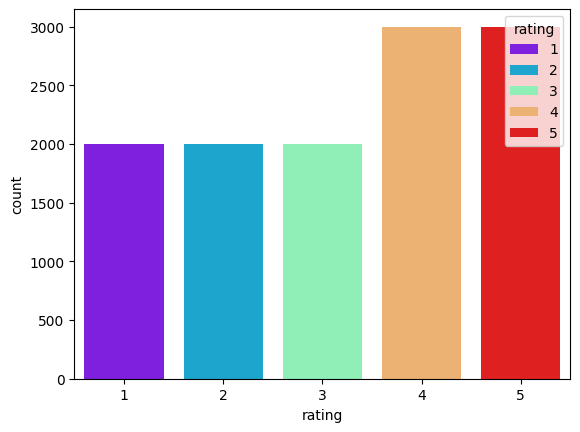

In [6]:
import seaborn as sns
sns.countplot(x = data["rating"],hue=data["rating"],palette="rainbow")

we can take all 5 as output variable but here we have to assume that the review is positive or negative, so we would convert output to a binary output

In [7]:
data["rating"] = data["rating"].apply(lambda x:0 if x<3 else 1) # positive review is 1 and negative review is 0
data.head()

C:\Users\rauna\AppData\Local\Temp\ipykernel_22076\1209779386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["rating"] = data["rating"].apply(lambda x:0 if x<3 else 1) # positive review is 1 and negative review is 0


,reviewText,rating
0,"Jace Rankin may be short, but he's nothing to ...",1
1,Great short read. I didn't want to put it dow...,1
2,I'll start by saying this is the first of four...,1
3,Aggie is Angela Lansbury who carries pocketboo...,1
4,I did not expect this type of book to be in li...,1


In [8]:
data["reviewText"] = data["reviewText"].str.lower()

C:\Users\rauna\AppData\Local\Temp\ipykernel_22076\212205314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["reviewText"] = data["reviewText"].str.lower()


In [9]:
df = data

In [10]:
#!pip install bs4

from bs4 import BeautifulSoup
from nltk.corpus import stopwords


In [12]:

from bs4 import BeautifulSoup
import re

## Removing special characters
df['reviewText']=df['reviewText'].apply(lambda x:re.sub('[^a-z A-z 0-9-]+', '',x))

C:\Users\rauna\AppData\Local\Temp\ipykernel_22076\2552523887.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviewText']=df['reviewText'].apply(lambda x:re.sub('[^a-z A-z 0-9-]+', '',x))


In [13]:
df

,reviewText,rating
0,jace rankin may be short but hes nothing to me...,1
1,great short read i didnt want to put it down ...,1
2,ill start by saying this is the first of four ...,1
3,aggie is angela lansbury who carries pocketboo...,1
4,i did not expect this type of book to be in li...,1
...,...,...
11995,valentine cupid is a vampire- jena and ian ano...,1
11996,i have read all seven books in this series apo...,1
11997,this book really just wasnt my cuppa the situ...,1
11998,tried to use it to charge my kindle it didnt e...,0


In [14]:

## Remove the stopswords
df['reviewText']=df['reviewText'].apply(lambda x:" ".join([y for y in x.split() if y not in stopwords.words('english')]))
df

C:\Users\rauna\AppData\Local\Temp\ipykernel_22076\2515653561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviewText']=df['reviewText'].apply(lambda x:" ".join([y for y in x.split() if y not in stopwords.words('english')]))


,reviewText,rating
0,jace rankin may short hes nothing mess man hau...,1
1,great short read didnt want put read one sitti...,1
2,ill start saying first four books wasnt expect...,1
3,aggie angela lansbury carries pocketbooks inst...,1
4,expect type book library pleased find price right,1
...,...,...
11995,valentine cupid vampire- jena ian another vamp...,1
11996,read seven books series apocalypticadventure o...,1
11997,book really wasnt cuppa situation man capturin...,1
11998,tried use charge kindle didnt even register ch...,0


In [15]:
## Remove url
df['reviewText']=df['reviewText'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x)))


C:\Users\rauna\AppData\Local\Temp\ipykernel_22076\3065307203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviewText']=df['reviewText'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x)))


In [16]:
df

,reviewText,rating
0,jace rankin may short hes nothing mess man hau...,1
1,great short read didnt want put read one sitti...,1
2,ill start saying first four books wasnt expect...,1
3,aggie angela lansbury carries pocketbooks inst...,1
4,expect type book library pleased find price right,1
...,...,...
11995,valentine cupid vampire- jena ian another vamp...,1
11996,read seven books series apocalypticadventure o...,1
11997,book really wasnt cuppa situation man capturin...,1
11998,tried use charge kindle didnt even register ch...,0


In [19]:
## Remove html tags
df['reviewText']=df['reviewText'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())
df

,reviewText,rating
0,jace rankin may short hes nothing mess man hau...,1
1,great short read didnt want put read one sitti...,1
2,ill start saying first four books wasnt expect...,1
3,aggie angela lansbury carries pocketbooks inst...,1
4,expect type book library pleased find price right,1
...,...,...
11995,valentine cupid vampire- jena ian another vamp...,1
11996,read seven books series apocalypticadventure o...,1
11997,book really wasnt cuppa situation man capturin...,1
11998,tried use charge kindle didnt even register ch...,0


In [20]:
## Remove any additional spaces
df['reviewText']=df['reviewText'].apply(lambda x: " ".join(x.split()))
df

,reviewText,rating
0,jace rankin may short hes nothing mess man hau...,1
1,great short read didnt want put read one sitti...,1
2,ill start saying first four books wasnt expect...,1
3,aggie angela lansbury carries pocketbooks inst...,1
4,expect type book library pleased find price right,1
...,...,...
11995,valentine cupid vampire- jena ian another vamp...,1
11996,read seven books series apocalypticadventure o...,1
11997,book really wasnt cuppa situation man capturin...,1
11998,tried use charge kindle didnt even register ch...,0


In [21]:
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()

In [22]:
def lemmatize_word(text):
    return " ".join([lm.lemmatize(word) for word in text.split()])

In [24]:
df['reviewText']=df['reviewText'].apply(lambda x: lemmatize_word(x))

In [25]:
df

,reviewText,rating
0,jace rankin may short he nothing mess man haul...,1
1,great short read didnt want put read one sitti...,1
2,ill start saying first four book wasnt expecti...,1
3,aggie angela lansbury carry pocketbook instead...,1
4,expect type book library pleased find price right,1
...,...,...
11995,valentine cupid vampire- jena ian another vamp...,1
11996,read seven book series apocalypticadventure on...,1
11997,book really wasnt cuppa situation man capturin...,1
11998,tried use charge kindle didnt even register ch...,0


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(df["reviewText"],df["rating"], test_size=0.3)

In [30]:
#Using BOW

from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer()

In [37]:
x_train = bow.fit_transform(x_train).toarray()

In [38]:
x_test = bow.transform(x_test).toarray()

In [39]:
from sklearn.naive_bayes import GaussianNB
gaussian_model = GaussianNB().fit(x_train,y_train)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [41]:
y_pred = gaussian_model.predict(x_test)

In [45]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.5775


In [47]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.42      0.63      0.50      1216
           1       0.75      0.55      0.63      2384

    accuracy                           0.58      3600
   macro avg       0.58      0.59      0.57      3600
weighted avg       0.63      0.58      0.59      3600



In [48]:
print(confusion_matrix(y_test,y_pred))

[[ 769  447]
 [1074 1310]]


Our model didn't preform good so now we will try word2vec

In [49]:
import gensim.downloader as api
wv = api.load("word2vec-google-news-300")

In [ ]:
import numpy as np
def avg_word2vec(doc):
    
    return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)

#We are doing the avgword2vec on every sentence to give single vector for a sentence